# Chapter 3 + 4 - graphics and accuracy

In [1]:
# shtuyot 
# prime factors
def factors(n):
    factorlist = []
    k=2
    while k <= n:
        while n%k == 0:
            factorlist.append(k)
            n //= k
        k += 1
    return factorlist
def factorial(n):
    if n == 0:
        return 1
    else:
        return n*factorial(n-1)

def binomal(n,k):
    return factorial(n) /(factorial(k)*factorial(n-k))

$\Upsilon_{k} = \frac{1}{2r + 1}\sum_{m=-r}^r y_{k+m}$

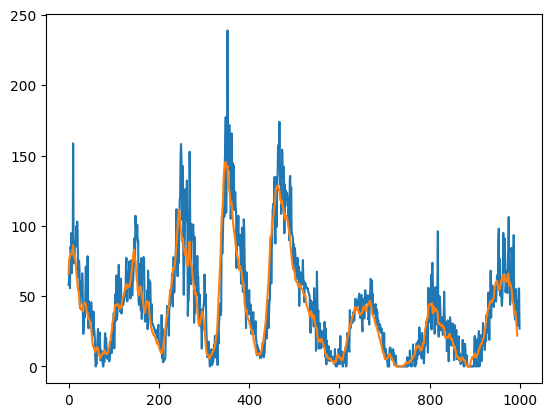

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./cpresources/sunspots.txt', delimiter='\t')
ha = list(data.iloc[:,1])
ha.insert(0,float(data.columns[1]))

plt.plot(ha[0:1000])
def running_avg(data,r):
    smoothed = []
    for i in range(r,len(data)):
        smoothed.append((1/(2*r + 1))*np.sum(data[i-r:i+r]))
    return smoothed
    
plt.plot(running_avg(ha[0:1000],5))

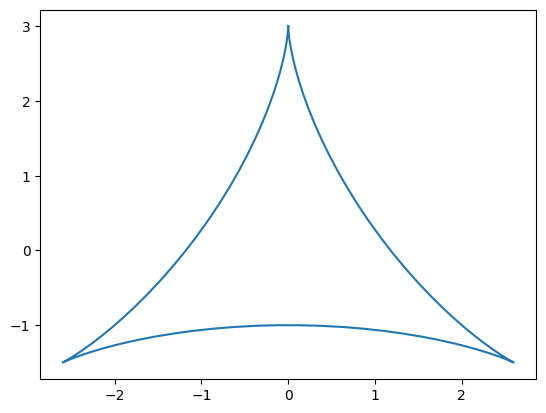

In [3]:
# fun beautiful plot
(x_fun) = lambda theta: 2*np.cos(theta) + np.cos(2*theta)
(y_fun) = lambda theta: 2*np.sin(theta) - np.sin(2*theta)

theta = np.linspace(0,2*np.pi,100)
x_grid, y_grid = np.meshgrid(theta,theta)
plt.plot(y_fun(theta),x_fun(theta))

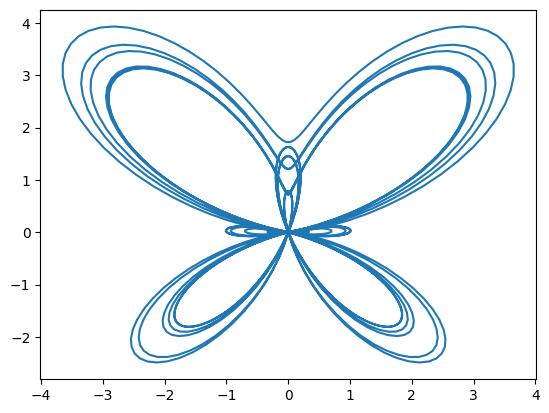

In [4]:
(r) = lambda theta: np.exp(np.cos(theta)) -2*np.cos(4*theta) + (np.sin(theta/12))**5 #theta**2

def plot_rad(theta):
    x = r(theta)*np.cos(theta)
    y = r(theta)*np.sin(theta)
    plt.plot(y,x)

plot_rad(np.linspace(0,12*np.pi,1000))

## Accuracy

In [1]:
# intresting note - when compering two decimals (floats) you should never check for exactness
#4.2 quadratic exercise
import numpy as np

def roots_1(a,b,c):
    descrem = np.sqrt(b**2 - 4*a*c)
    return (-b + descrem)/2*a, (-b - descrem)/2*a

def roots_2(a,b,c):
    descrem = np.sqrt(b**2 - 4*a*c)
    return (2*c)/(-b - descrem), (2*c)/(-b + descrem)
    
print(roots_1(0.001,1000,0.001))
print(roots_2(0.001,1000,0.001))

(-9.999894245993345e-13, -0.999999999999)
(-1.000000000001e-06, -1000010.5755125057)


In [9]:
h = -9.999894245993345e-13
print(0.001*h**2 + 1000*h + 0.001)

0.0009999990000105754


In [24]:
#4.3
(func) = lambda x: x*(x-1)
def derivative (delta,loc):
    return (func(loc + delta) - func(loc))/delta
    
derivative(1e-12,1)

1.0000889005833413

### quantum oscilator example
$$ 
<E> = \frac{1}{Z}\sum_{n=0}^{\infty}E_ne^{-\beta E_n}
$$
$$
\beta = \frac{1}{k_B T}
$$

In [6]:
from math import exp
terms = 100000000
beta = 1/100
S = 0.0
Z = 0.0
for n in range(terms):
   E = n + 0.5
   weight = exp(-beta*E)
   S += weight*E
   Z += weight
print(S/Z)

100.00083333194436


## exercise 4.4
$$I = \int^{1}_{-1} \sqrt{1 - x^2}dx $$

In [21]:
(func) = lambda x: np.sqrt(1-x**2)
N = 100000
spacing = 2/N
domain = spacing*np.arange(1,N + 1) - 1
np.sum(spacing*np.array(list(map(func, domain))))

1.5707962742034116

In [15]:
spacing*np.arange(1,100) - 1

array([-0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82,
       -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64,
       -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46,
       -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28,
       -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 ,
       -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,
        0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,
        0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,  0.44,
        0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,  0.62,
        0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,  0.8 ,
        0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,  0.98])